__Author:__ Bram Van de Sande

__Date:__ 11 OCT 2019

__Outline:__ Request from Chris Flerin:

Could I ask you to re-generate some figures for the paper in higher quality? Specifically the cancer t-SNE figures (Figure 12), and the heatmap (Figure 13). I see that you put SVG files in the google drive folder, but actually when I open them, it seems that the plots are really just rendered as png/jpeg graphics (and somewhat low-quality as well). I noticed that this is the default export setting in Scanpy actually. I think you can change it by setting something like:
 
sc.set_figure_params(frameon=False, dpi=150, fontsize=10, dpi_save=600)
 
Even so, it will still render the t-SNE/UMAP scatter plots (but at higher dpi) due to the “vector_friendly=True” option. I left this as a 600dpi on the PBMC plots, which I think will be ok, but it’s up to you if you want to make them full vector images.
 
Sorry if you’ve already done this and I just can’t find it somewhere! I created a new folder in: “SCENIC Nature protocols manuscript/Figures-high-quality/” if that helps.

In [1]:
import os, glob, re, pickle
from functools import partial
from collections import OrderedDict
import operator as op
from cytoolz import compose

import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib as mpl
import matplotlib.pyplot as plt

from pyscenic.export import export2loom, add_scenic_metadata
from pyscenic.utils import load_motifs
from pyscenic.transform import df2regulons
from pyscenic.aucell import aucell
from pyscenic.binarization import binarize
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_binarization, plot_rss

/Users/bramvandesande/miniconda3/envs/scenic_protocol/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
# Set maximum number of jobs for Scanpy.
sc.settings.njobs = 32
sc.set_figure_params(frameon=False, dpi=150, fontsize=10, dpi_save=600)

In [25]:
RESOURCES_FOLDERNAME = "/Users/bramvandesande/Projects/lcb/protocol/resources/"
AUXILLIARIES_FOLDERNAME = "/Users/bramvandesande/Projects/lcb/protocol/auxilliaries/"
RESULTS_FOLDERNAME = "/Users/bramvandesande/Projects/lcb/protocol/results/"
FIGURES_FOLDERNAME = "./figures/"

# FIGURE 12

In [41]:
DATASET_ID = "GSE115978"
TCGA_CODE = 'SKCM'

In [42]:
ANNDATA_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.h5ad'.format(DATASET_ID))
ANNDATA_AUCELL_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.aucell.h5ad'.format(DATASET_ID))

In [29]:
SKCM_AD = sc.read_h5ad(ANNDATA_FNAME)

In [30]:
sc.tl.tsne(SKCM_AD, use_rep='X_aucell')

In [43]:
SKCM_AD.write_h5ad(ANNDATA_AUCELL_FNAME)

saving figure to file ./figures/tsne-figure12-skcm-celltype-myc_regulon.svg


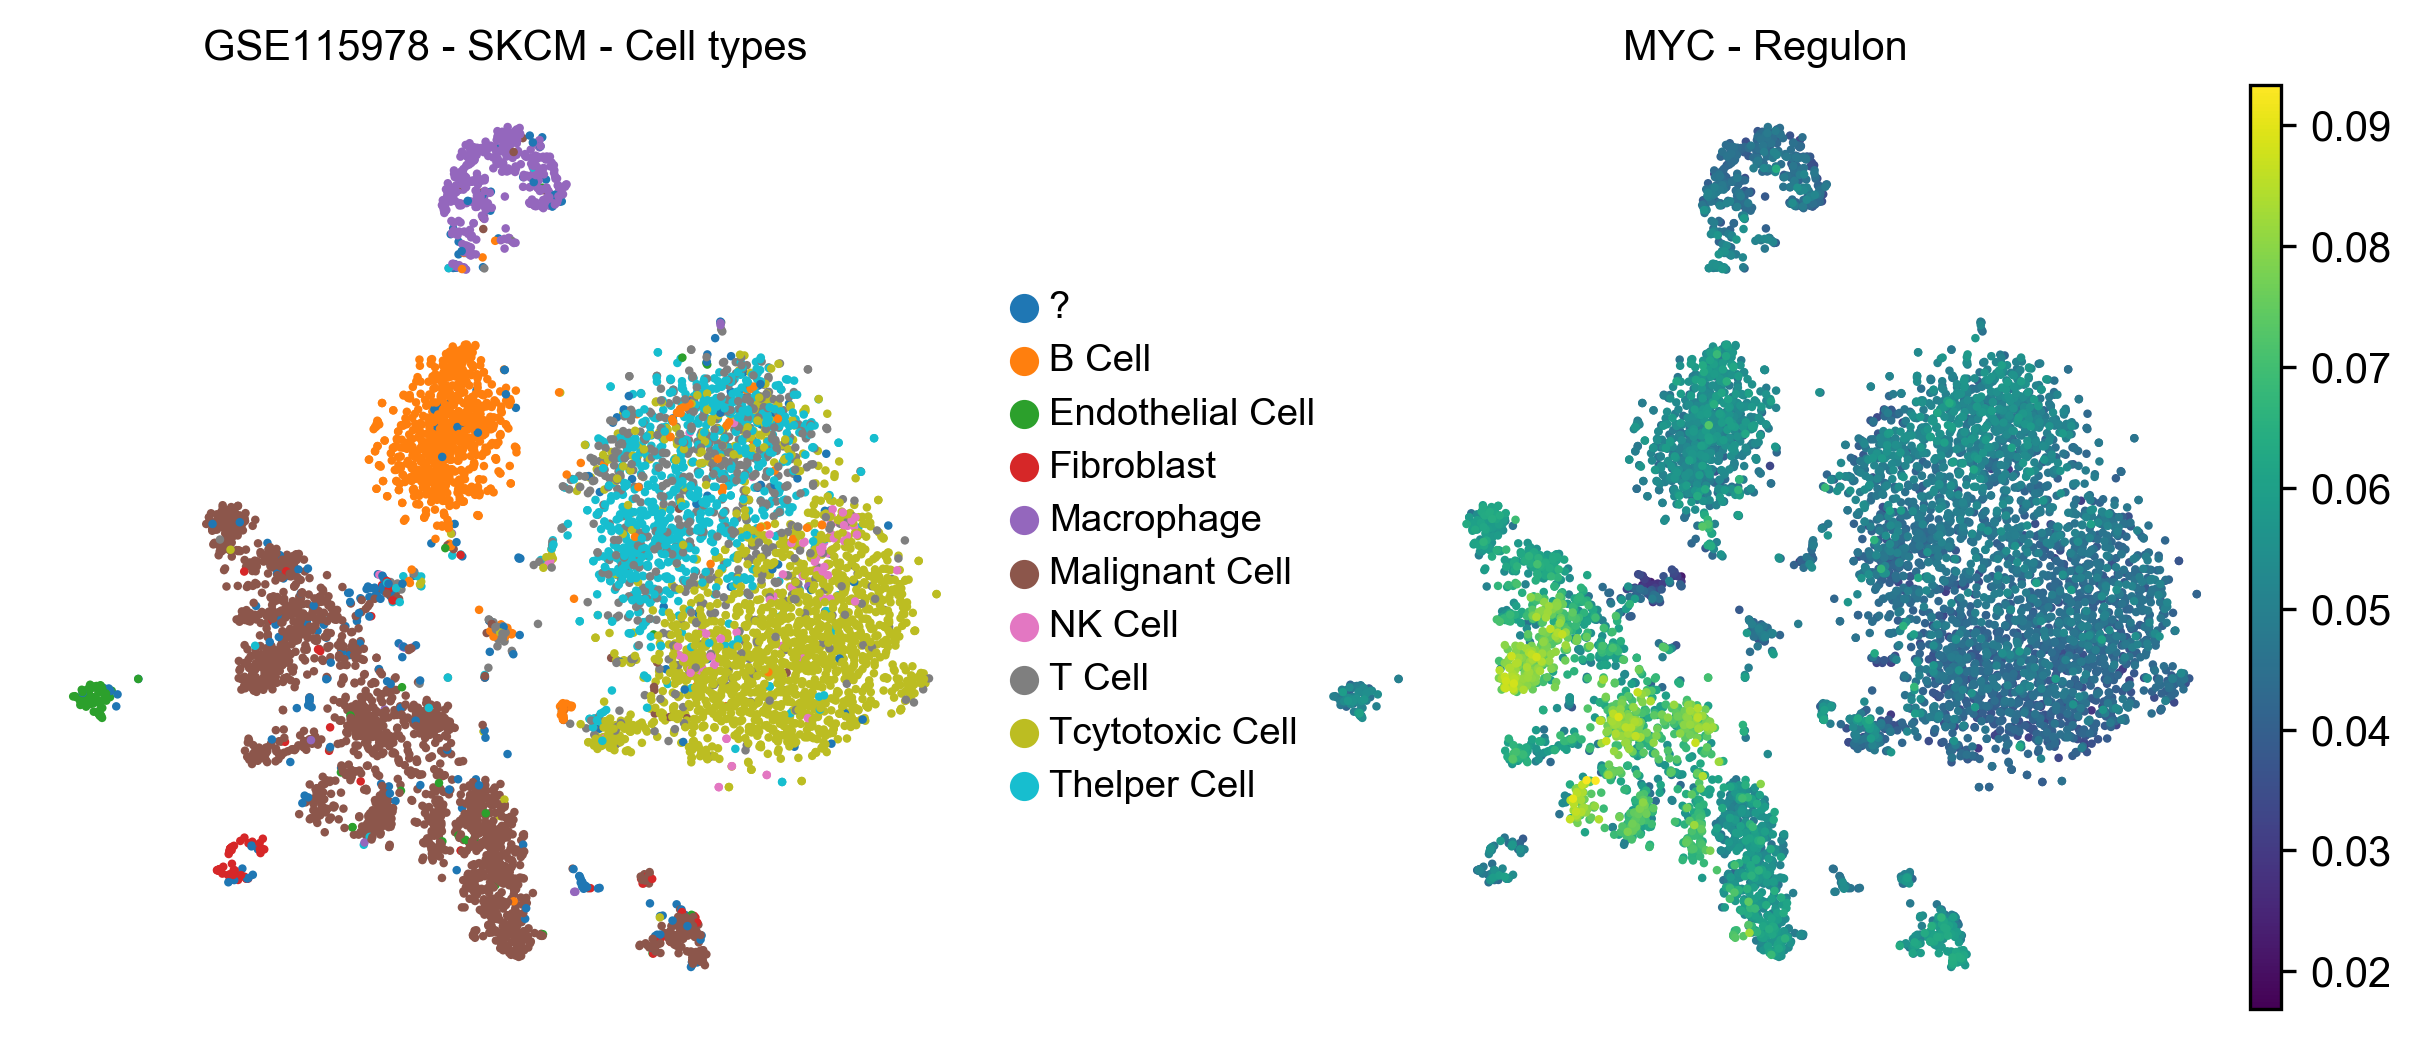

In [31]:
sc.pl.tsne(SKCM_AD, color=['cell_type', 'Regulon(MYC)'], 
           title=['GSE115978 - SKCM - Cell types', 'MYC - Regulon'], ncols=3, use_raw=False,
          save='-figure12-skcm-celltype-myc_regulon.svg', cmap='viridis')

saving figure to file ./figures/tsne-figure12-skcm-myc_gene.svg


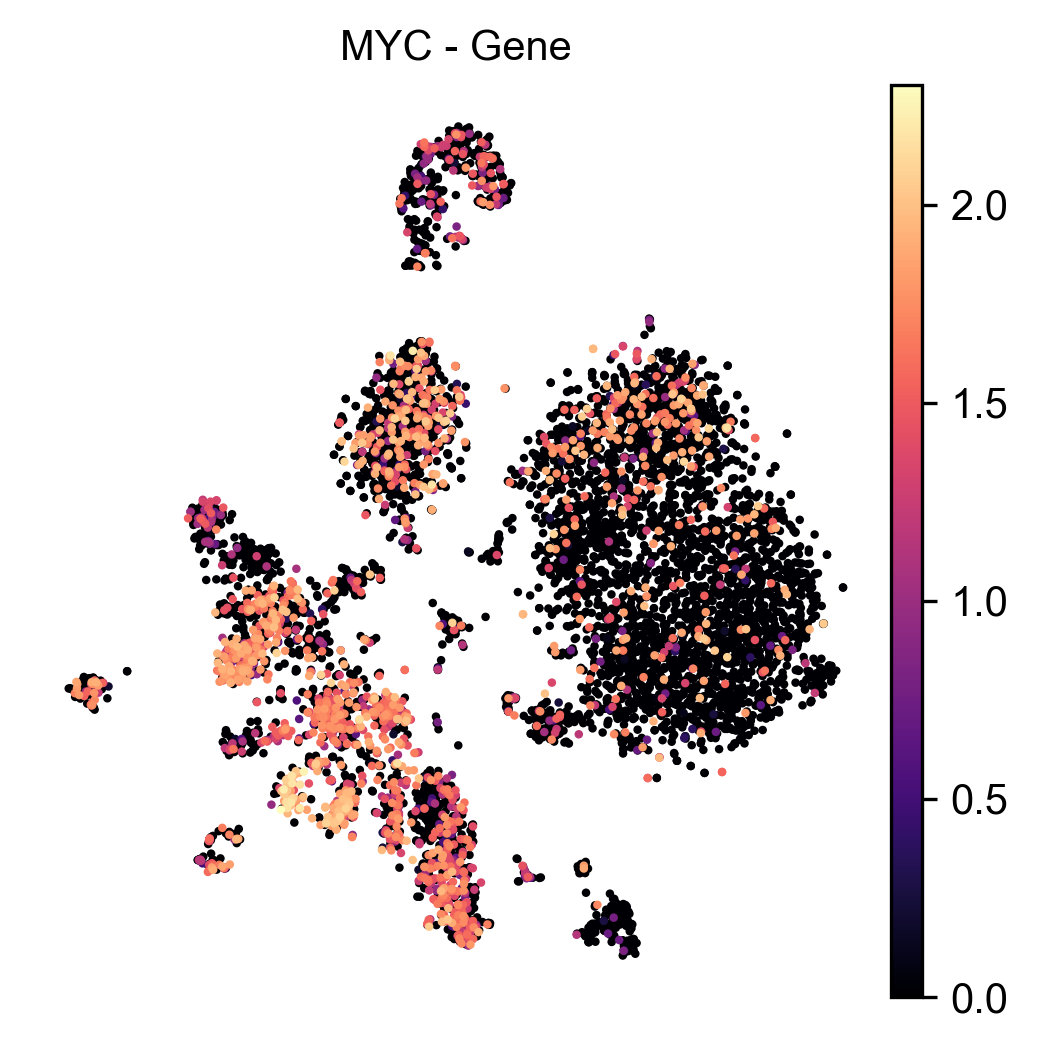

In [32]:
sc.pl.tsne(SKCM_AD, color=['MYC'], 
           title=['MYC - Gene'], ncols=3,  use_raw=False,
          save='-figure12-skcm-myc_gene.svg', cmap='magma')

In [44]:
DATASET_ID = "GSE103322"
TCGA_CODE = 'HNSC'

In [45]:
ANNDATA_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.h5ad'.format(DATASET_ID))
ANNDATA_AUCELL_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.aucell.h5ad'.format(DATASET_ID))

In [21]:
HNSC_AD = sc.read_h5ad(ANNDATA_FNAME)

In [22]:
sc.tl.tsne(HNSC_AD, use_rep='X_aucell')

In [46]:
HNSC_AD.write_h5ad(ANNDATA_AUCELL_FNAME)

saving figure to file ./figures/tsne-figure12-hnsc-celltype-myc_regulon.svg


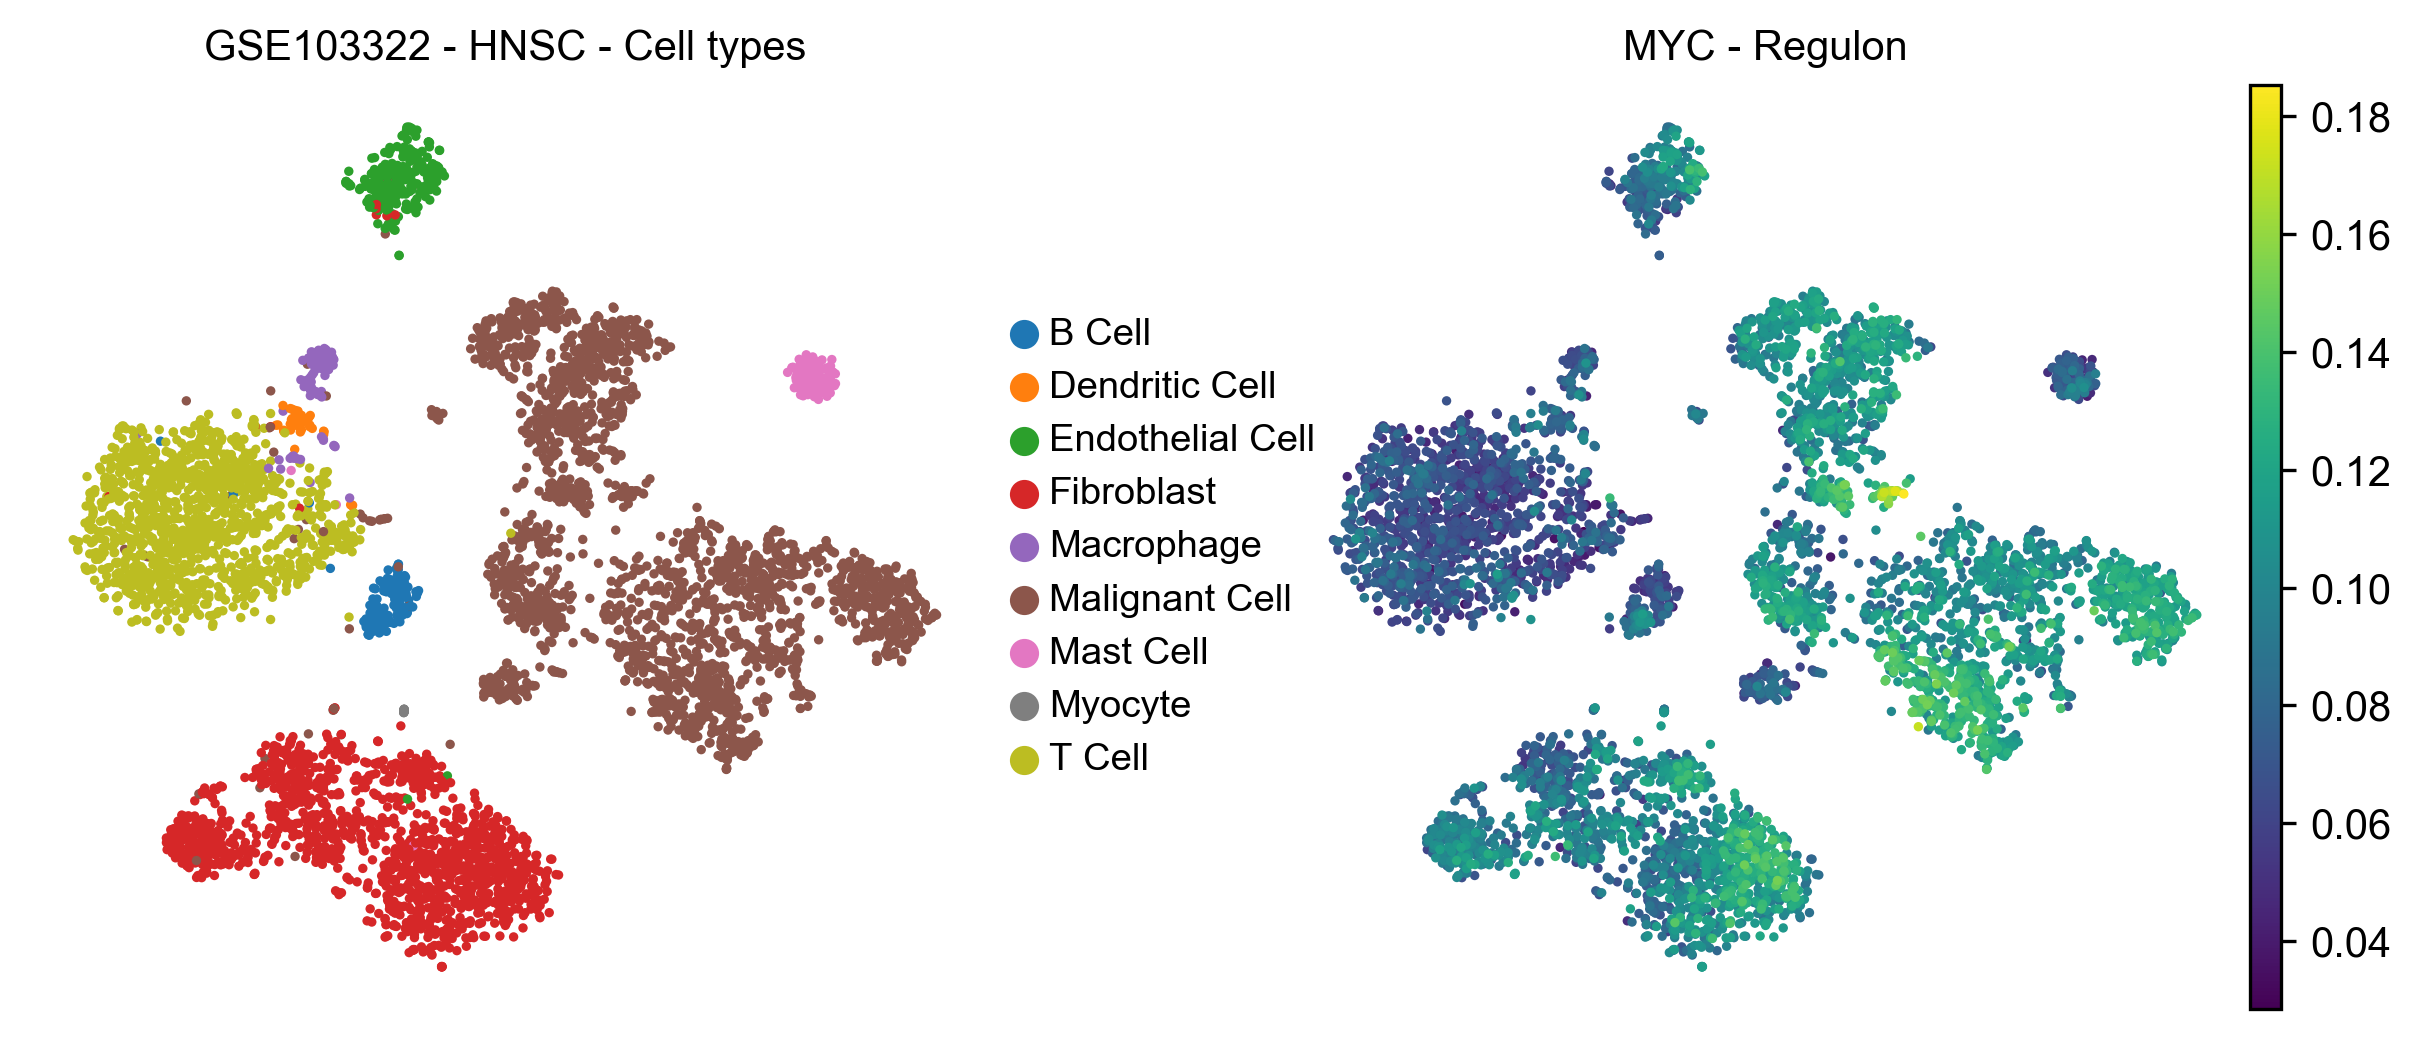

In [23]:
sc.pl.tsne(HNSC_AD, color=['cell_type', 'Regulon(MYC)'], 
           title=['GSE103322 - HNSC - Cell types', 'MYC - Regulon'], ncols=3, use_raw=False,
          save='-figure12-hnsc-celltype-myc_regulon.svg', cmap='viridis')

saving figure to file ./figures/tsne-figure12-hnsc-myc_gene.svg


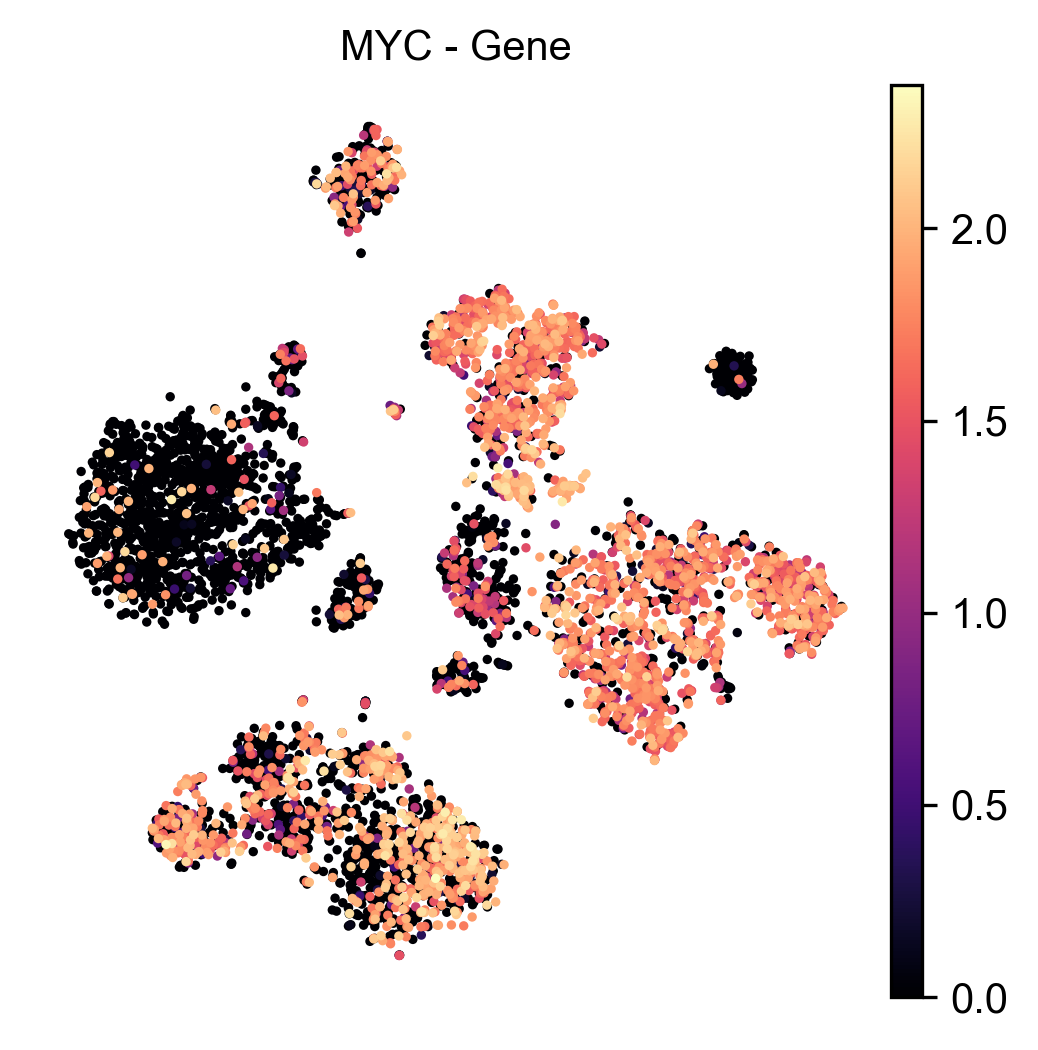

In [24]:
sc.pl.tsne(HNSC_AD, color=['MYC'], 
           title=['MYC - Gene'], ncols=3, use_raw=False,
          save='-figure12-hnsc-myc_gene.svg', cmap='magma')

In [47]:
DATASET_ID = "E-MTAB-6149_6653"
TCGA_CODE = 'LUAD_LUSC'

In [48]:
ANNDATA_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.h5ad'.format(DATASET_ID))
ANNDATA_AUCELL_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.aucell.h5ad'.format(DATASET_ID))

In [35]:
NSCLC_AD = sc.read_h5ad(ANNDATA_FNAME)

In [36]:
sc.tl.tsne(NSCLC_AD, use_rep='X_aucell')

In [49]:
NSCLC_AD.write_h5ad(ANNDATA_AUCELL_FNAME)

saving figure to file ./figures/tsne-figure12-nsclc-celltype-myc_regulon.svg


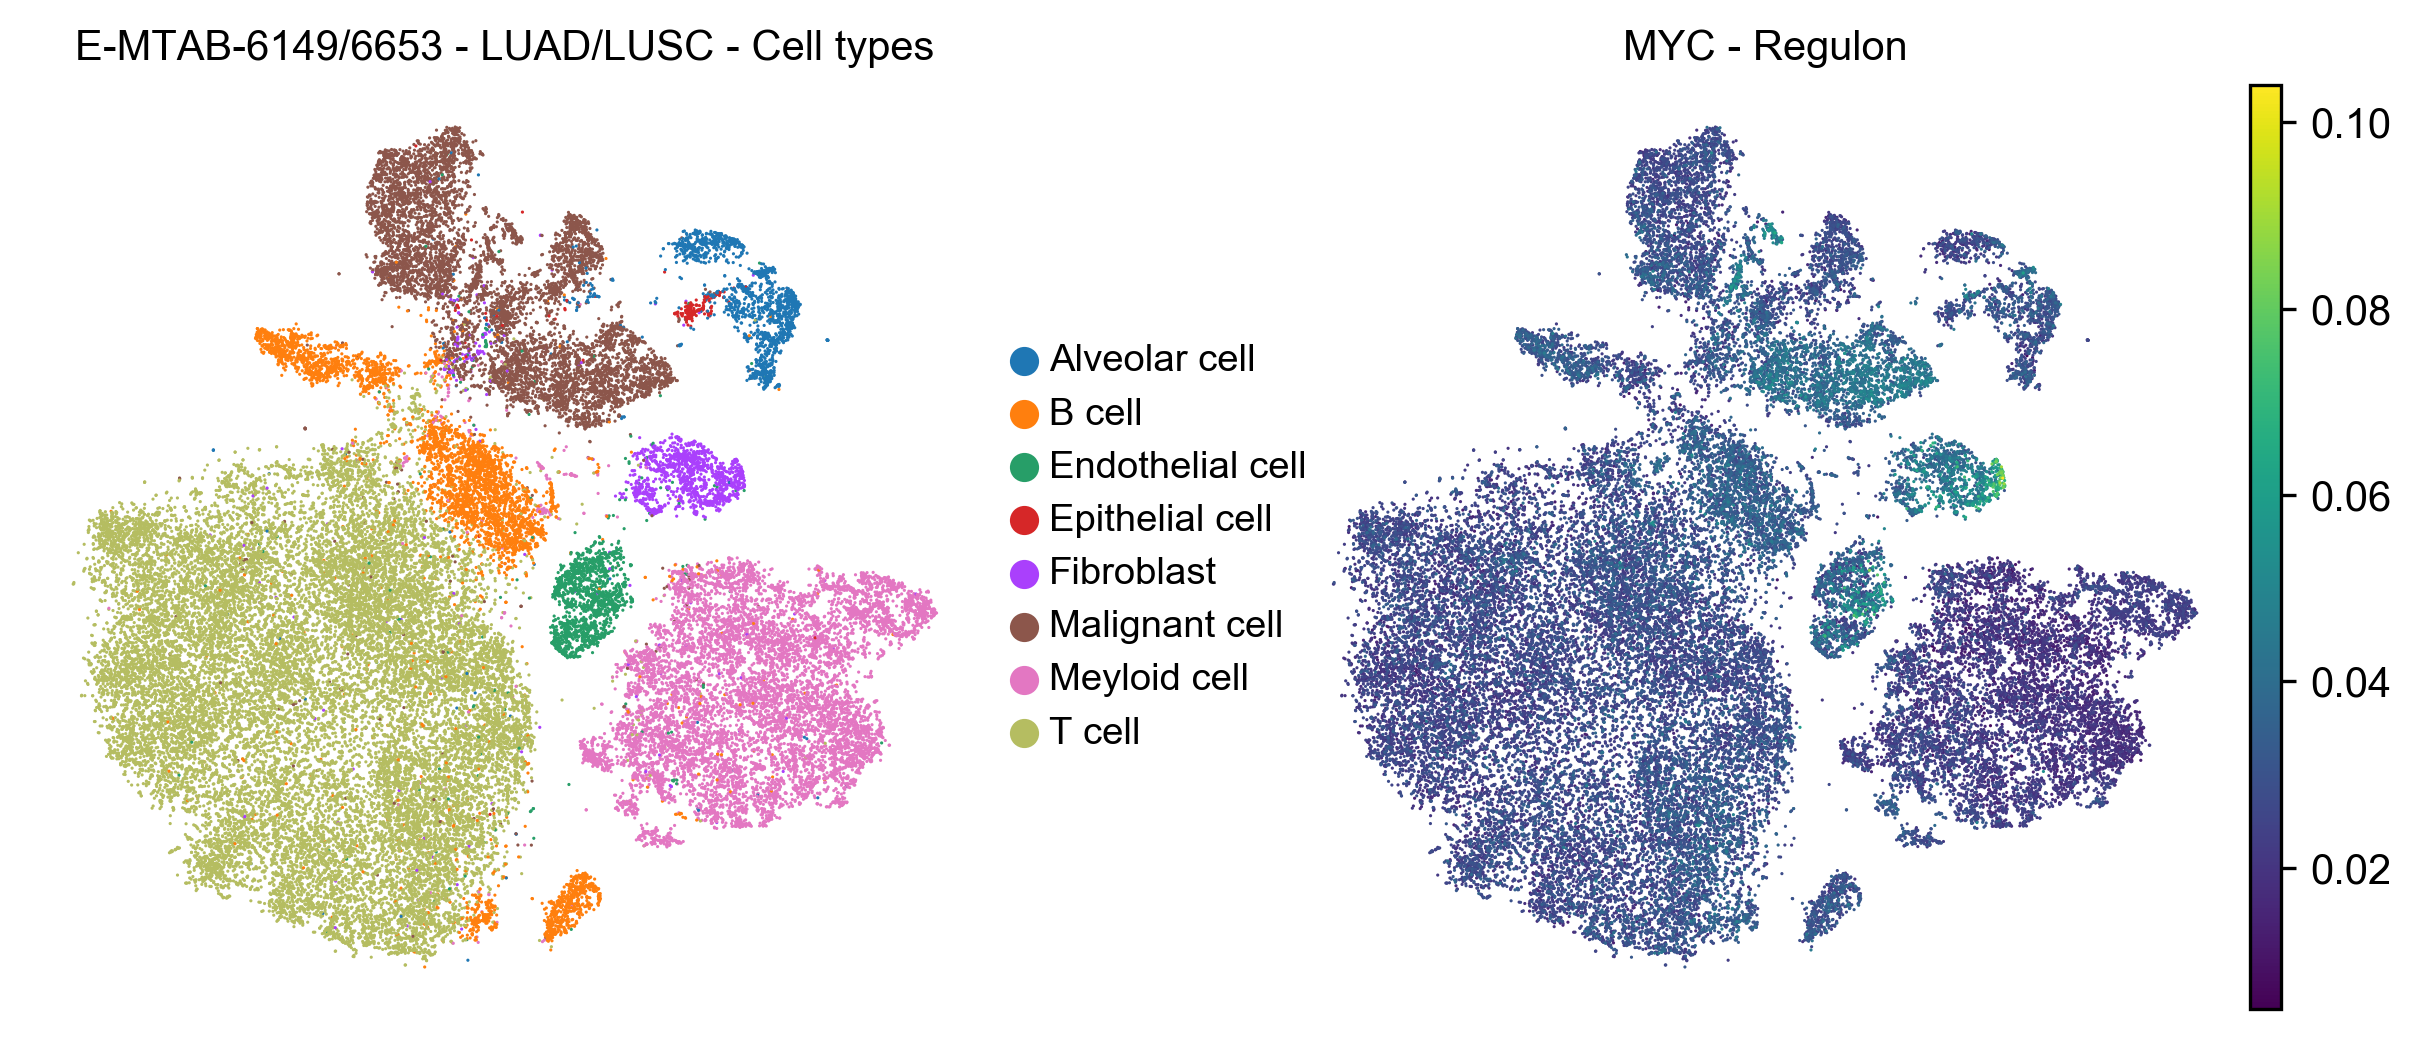

In [37]:
sc.pl.tsne(NSCLC_AD, color=['cell_type', 'Regulon(MYC)'], 
           title=['E-MTAB-6149/6653 - LUAD/LUSC - Cell types', 'MYC - Regulon'], ncols=3, use_raw=False,
          save='-figure12-nsclc-celltype-myc_regulon.svg', cmap='viridis')

saving figure to file ./figures/tsne -figure12-nsclc-myc_gene.svg


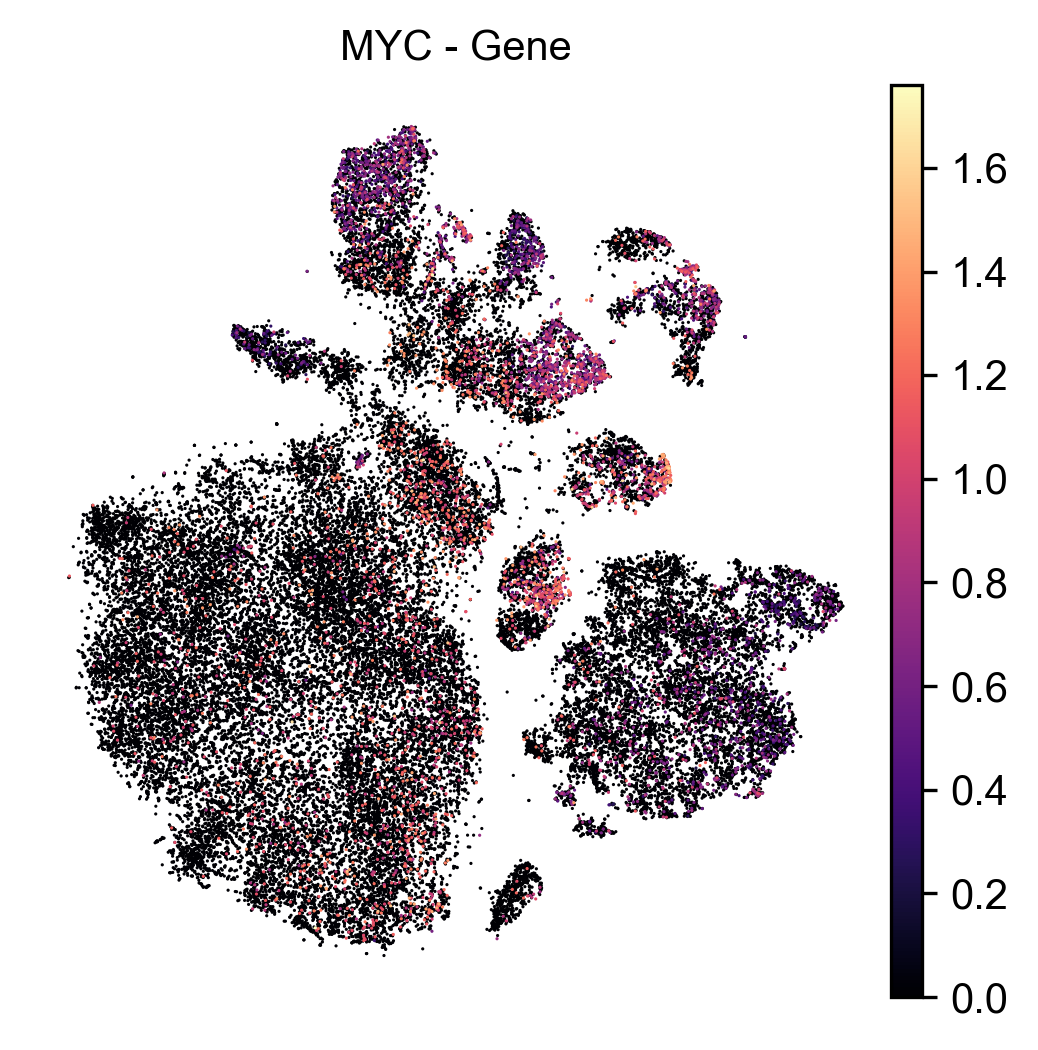

In [38]:
sc.pl.tsne(NSCLC_AD, color=['MYC'], 
           title=['MYC - Gene'], ncols=3, use_raw=False,
          save=' -figure12-nsclc-myc_gene.svg', cmap='magma')

# FIGURE 13

In [4]:
DATASET_ID = "GSE115978"
TCGA_CODE = 'SKCM'

In [32]:
AUCELL_MTX_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.auc.csv'.format(DATASET_ID))
BIN_MTX_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.bin.csv'.format(DATASET_ID))
ANNDATA_AUCELL_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.aucell.h5ad'.format(DATASET_ID))
METADATA_FNAME = os.path.join(RESULTS_FOLDERNAME, '{}.metadata.csv'.format(DATASET_ID))

In [33]:
auc_mtx = pd.read_csv(AUCELL_MTX_FNAME, index_col=0)

In [6]:
bin_mtx = pd.read_csv(BIN_MTX_FNAME, index_col=0)

In [9]:
SKCM_AD = sc.read_h5ad(ANNDATA_AUCELL_FNAME)

In [17]:
df_metadata = pd.read_csv(METADATA_FNAME)

In [18]:
df_metadata.head()

cell_id sample_id       cell_type  cohort  \
0  cy78_CD45_neg_1_B04_S496_comb     MEL78  Malignant Cell  Tirosh   
1  cy78_CD45_neg_3_H06_S762_comb     MEL78  Malignant Cell  Tirosh   
2  cy78_CD45_neg_1_D07_S523_comb     MEL78  Malignant Cell  Tirosh   
3  cy78_CD45_neg_3_D01_S709_comb     MEL78  Malignant Cell  Tirosh   
4  cy78_CD45_neg_2_B08_S596_comb     MEL78  Malignant Cell  Tirosh   

   no.of.genes  no.of.reads patient_id  age sex  \
0         8258       357919      Mel78   73   M   
1         7409       380341      Mel78   73   M   
2         8548       394632      Mel78   73   M   
3         8472       425938      Mel78   73   M   
4         6475        70466      Mel78   73   M   

                        treatment       treatment_group lesion_type  \
0  WDVAX, ipilimumab + nivolumab   Post-ICI (resistant)  metastasis   
1  WDVAX, ipilimumab + nivolumab   Post-ICI (resistant)  metastasis   
2  WDVAX, ipilimumab + nivolumab   Post-ICI (resistant)  metastasis   
3  WDVAX, ipilimumab + nivolumab   Post-ICI (resistant)  metastasis   
4  WDVAX, ipilimumab + nivolumab   Post-ICI (resistant)  metastasis   

           site  
0  Small bowel   
1  Small bowel   
2  Small bowel   
3  Small bowel   
4  Small bowel

In [11]:
N_COLORS = len(SKCM_AD.obs.cell_type.dtype.categories)
COLORS = [color['color'] for color in mpl.rcParams["axes.prop_cycle"]]

In [36]:
SKCM_AD.uns['cell_type_colors']

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], dtype=object)

In [39]:
#cell_type_color_lut = dict(zip(SKCM_AD.obs.cell_type.dtype.categories, COLORS))
cell_type_color_lut = dict(zip(SKCM_AD.obs.cell_type.dtype.categories, SKCM_AD.uns['cell_type_colors']))
cell_id2cell_type_lut = df_metadata.set_index('cell_id').cell_type.to_dict()
bw_palette = sns.xkcd_palette(["white", "black"])

In [20]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [28]:
def savesvg(fname: str, fig, folder: str=FIGURES_FOLDERNAME) -> None:
    """
    Save figure as vector-based SVG image format.
    """
    fig.tight_layout()
    fig.savefig(os.path.join(folder, fname), format='svg')

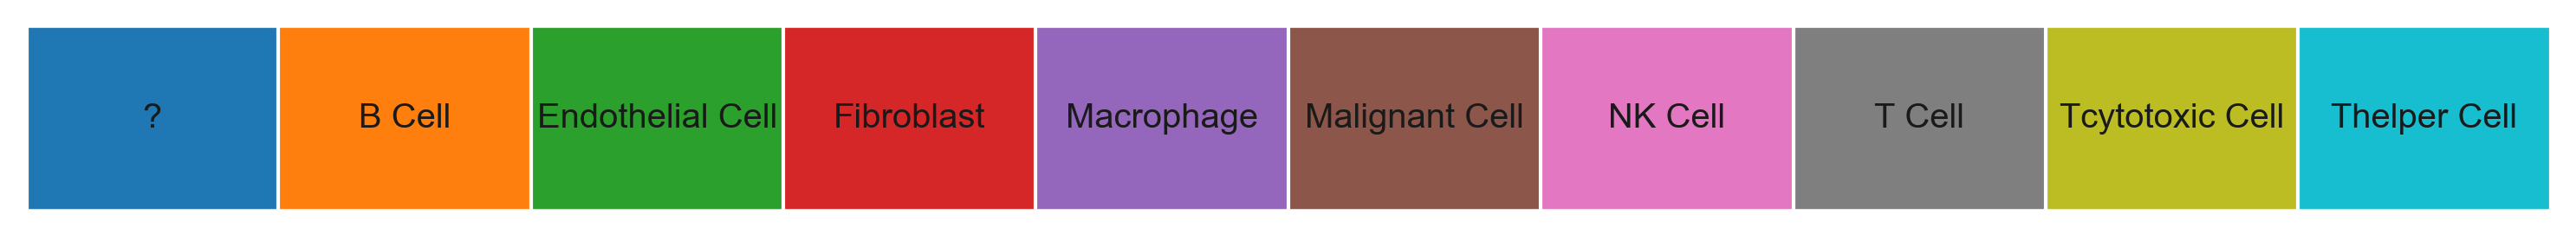

In [42]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot(sns.color_palette(SKCM_AD.uns['cell_type_colors']), SKCM_AD.obs.cell_type.dtype.categories, size=1.0)
savesvg('legend-figure13-cell_type_colors.svg', fig)

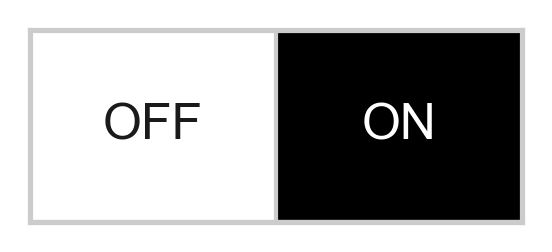

In [29]:
sns.set()
sns.set_style("whitegrid")
fig = palplot(bw_palette, ['OFF', 'ON'], ['k', 'w'])
savesvg('legend-figure13-on_off.svg', fig)

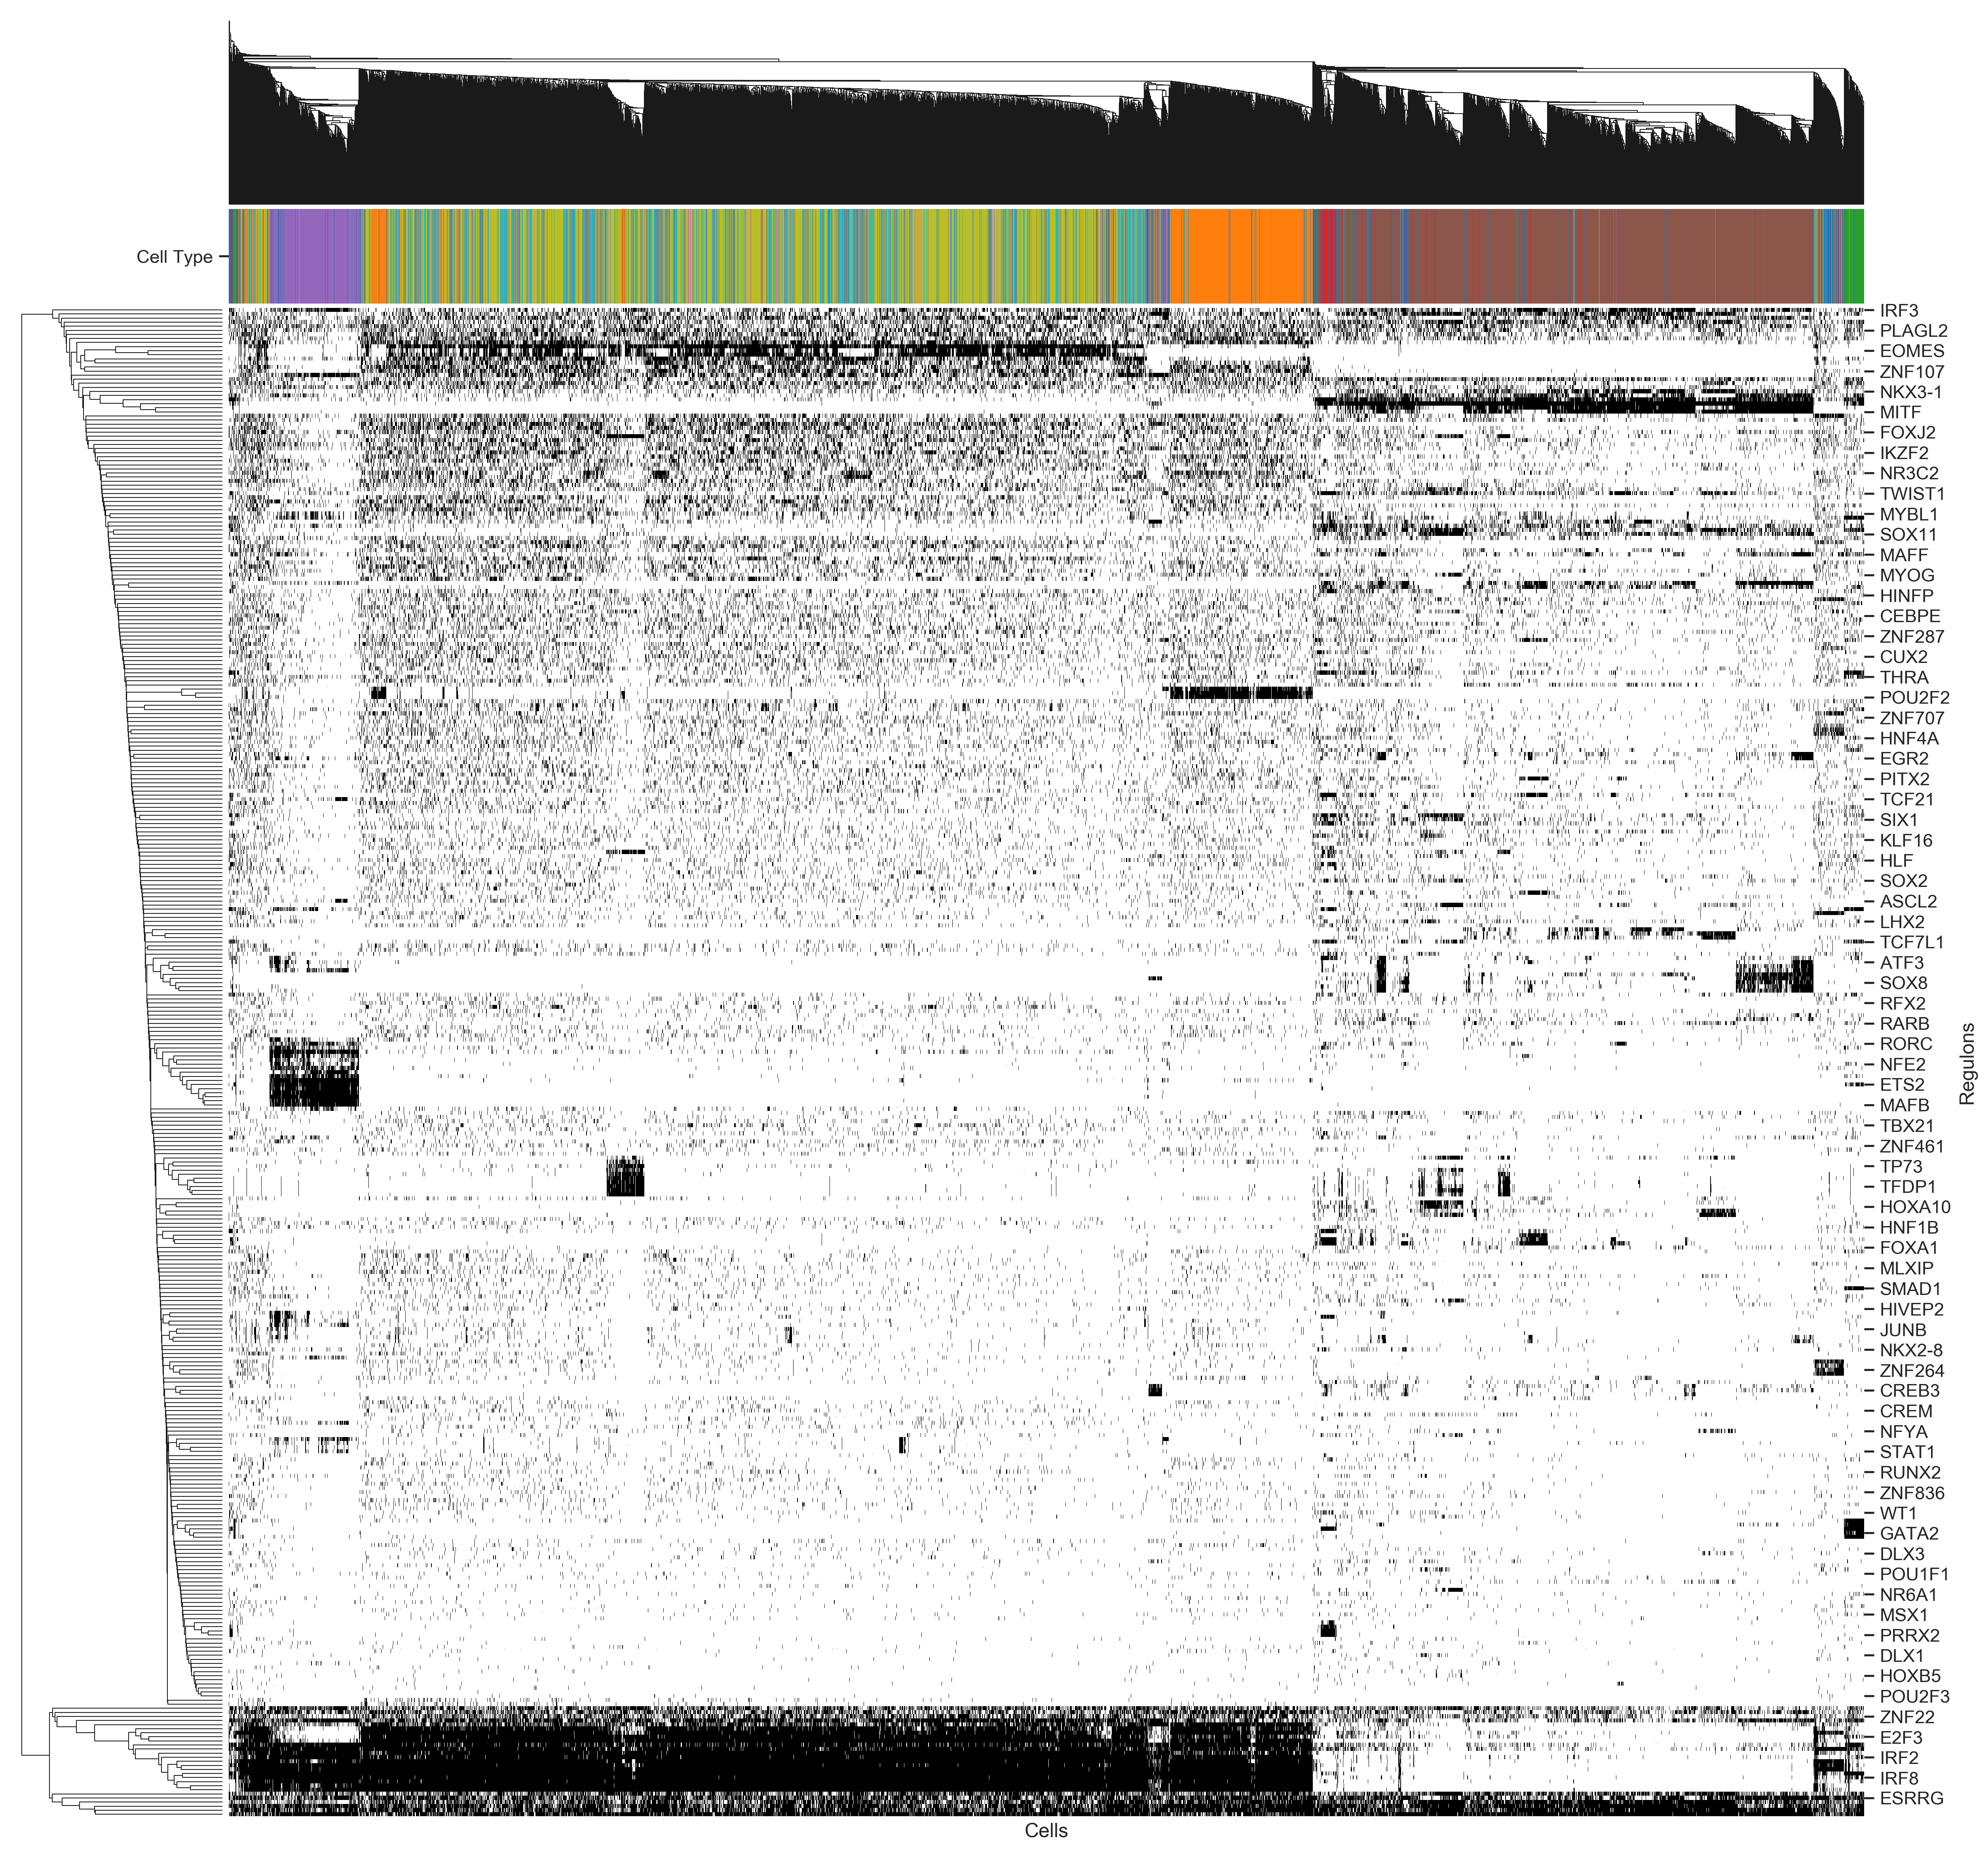

In [41]:
sns.set()
sns.set(font_scale=1.0)
sns.set_style("ticks", {"xtick.minor.size": 1, "ytick.minor.size": 0.1})
g = sns.clustermap(bin_mtx.T, 
               col_colors=auc_mtx.index.map(cell_id2cell_type_lut).map(cell_type_color_lut),
               cmap=bw_palette, figsize=(20,20))
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('Cells')
g.ax_heatmap.set_ylabel('Regulons')
g.ax_col_colors.set_yticks([0.5])
g.ax_col_colors.set_yticklabels(['Cell Type'])
g.cax.set_visible(False)
g.fig.savefig(os.path.join(FIGURES_FOLDERNAME, 'heatmap-figure13.png'), format='png', dpi=600)